In [4]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
%matplotlib inline
import missingno as msno
from sklearn import preprocessing
#from dython import nominal
from collections import Counter


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import xgboost
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

## Loading Data

In [7]:
emp_train = pd.read_csv("employee_attrition_train.csv") #train dataset
emp_test = pd.read_csv("employee_attrition_test.csv") #test dataset

In [8]:
list(emp_train.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
df = pd.concat([emp_train, emp_test], ignore_index=True)

In [10]:
emp_train.Attrition = emp_train.Attrition.apply(lambda x: 0 if x == 'No' else 1)

In [11]:
y_train = emp_train['Attrition'] #target variable

In [12]:
emp_train_updated = emp_train.drop(['Attrition'], axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1279 non-null   float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1460 non-null   object 
 3   DailyRate                 1429 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1321 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## Exploring the dataset

In [14]:
df.Attrition

0        No
1        No
2       Yes
3        No
4        No
       ... 
1465    NaN
1466    NaN
1467    NaN
1468    NaN
1469    NaN
Name: Attrition, Length: 1470, dtype: object

In [15]:
profile_report = ProfileReport(df, minimal=True)

In [16]:
profile_report

Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

So, from the whole profiling report a basic version of EDA has already been done. So, if I just summarise it: \

`Age` column. has 191 (13%) missimng value \
`DistanceFromHome` has 149 (10.1%) missing values \
In total there are 399 missing values which is 0.8% of total dataset. There are 26 numeric and 8 categorical variables. \

The mean age is 37.95 (38 years) where minimum is 18 and maximum is 60 years. As there are old people's dataset as well that's why there are some data who has already been retired. \

Most of the employees doesn't travel that much. \

Highest number of employees are in R&D department. So we can say the company is more research oriented and innovation driven. \

Among the education level most of the employees have finished their bachelor, the next highest is the masters degree. and most of them are from Life Sciences and Medical Department.

In the gender part among 1470 entry 882 are male and 588 are female. so almost 60% of them are male. 

But a wierd thing is most of them are sales executive and second highest is Research Scientist.


In [17]:
def plot_category(feature, figsize=None):
    yes_count = df[df['Attrition']== 'Yes'].groupby([feature]).size()
    no_count = df[df['Attrition'] == 'No'].groupby([feature]).size()
    labels = no_count.index

    x = np.arange(len(labels)) # the label locations
    width = 0.35  # the width of the bars

    if figsize:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = plt.subplots()
    rects1 = ax.bar(x-width/2, round(yes_count*100/df.groupby([feature]).size(), 2), 
                    width, label='Yes')
    rects2 = ax.bar(x+width/2, round(no_count*100/df.groupby([feature]).size(), 2), 
                    width, label='No')

    ax.set_ylabel('Count')
    ax.set_title('Based on %s'%feature)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=80)
    ax.legend();

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)

    fig.tight_layout()
    plt.show()

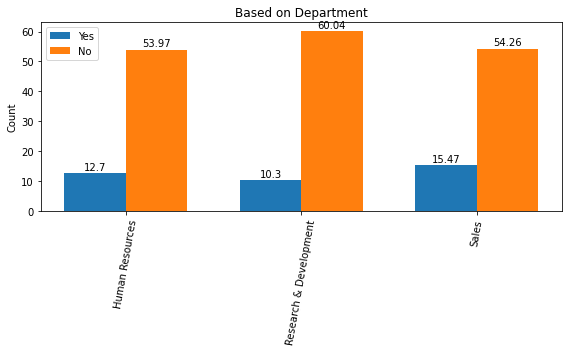

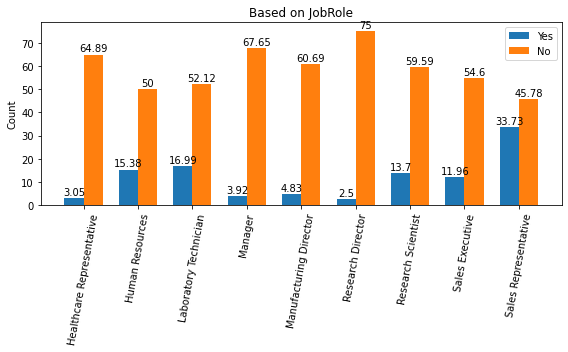

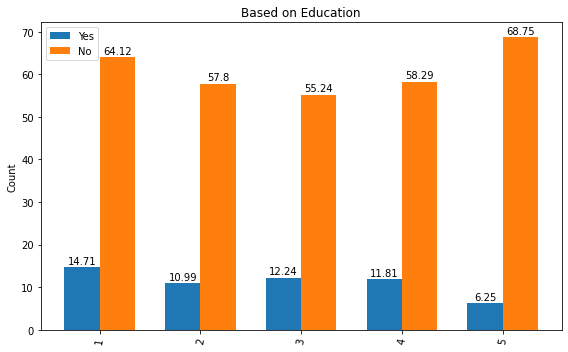

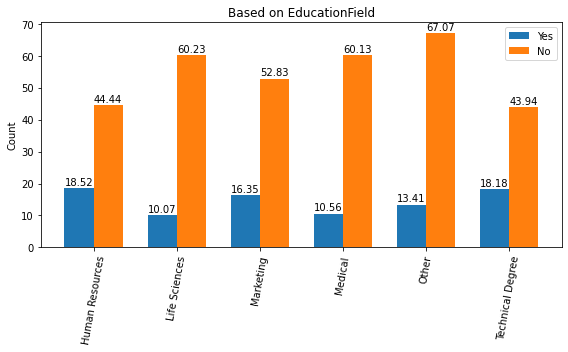

In [18]:
for feature in ['Department', 'JobRole', 'Education', 'EducationField']:
    plot_category(feature, figsize=(8,5))

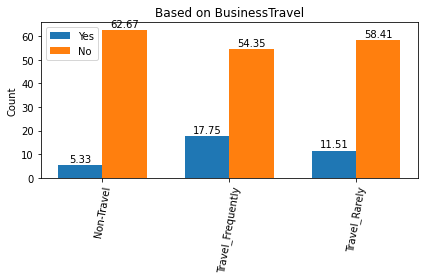

In [19]:
for feature in ['BusinessTravel']:
    plot_category(feature)

In [16]:
emp_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.00,37.0,44.0,60.0
Attrition,1029.0,0.171040,0.376727,0.0,0.00,0.0,0.0,1.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0


The above Describe function shows quick descriptive statistical summary of the Numerical data. Here we can see that Age, DailyRate and DistanceFromHome has some missing values, which we will explore later.

Other descriptions of the features are:

HourlyRate, MonthlyRate, DailyRate, Age are not skewed
DistanceFromHome, YearsAtCompany, PercentSalaryHike, YearsInCurrentRole, TotalWorkingYears, MonthlyIncome, NumCompaniesWorked, YearsSinceLastPromotion, YearsWithCurrentManager are Right Skewed
Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance are Numerical but Discrete Variable
Values of EmployeeCount, StandardHours are same for each rows.
Although these are some overall observations and we will explore data further to find more Insights.

In [22]:
def plot_numerical(feature, figsize=None):
    # Attrition vs Age Distribution
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(df[df['Attrition']=='No'][feature])
    sns.kdeplot(df[df['Attrition']=='Yes'][feature])

    fig.legend(labels=['Attrition No', 'Attrition Yes'])
    plt.title('Based on %s'%feature)
    plt.show()

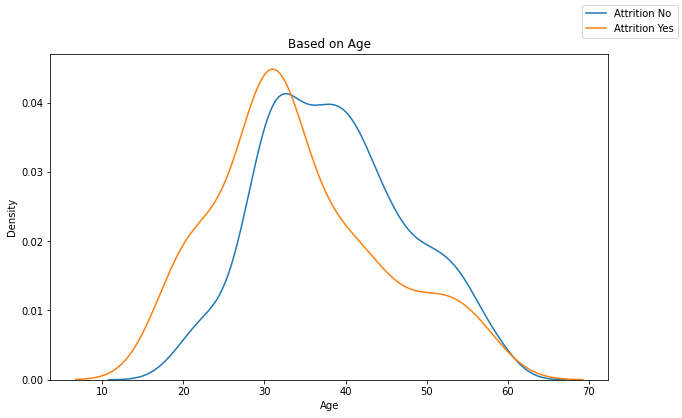

In [23]:
for feature in ['Age']:
    plot_numerical(feature)

KDE - Kernel Density Estimation. It is used for visualizing the probability Density of a continuous variable. One dimensional, Two dimensional KDE plot

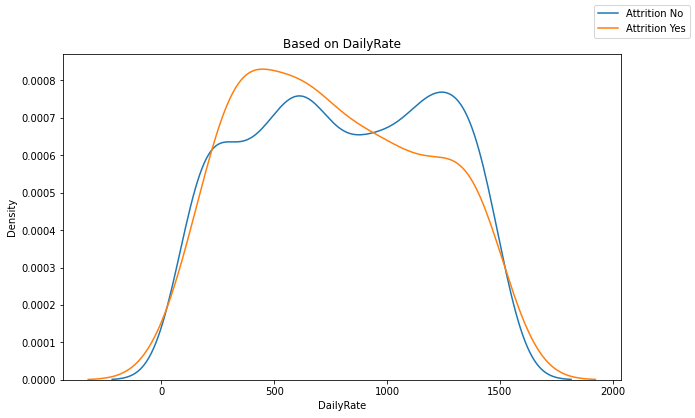

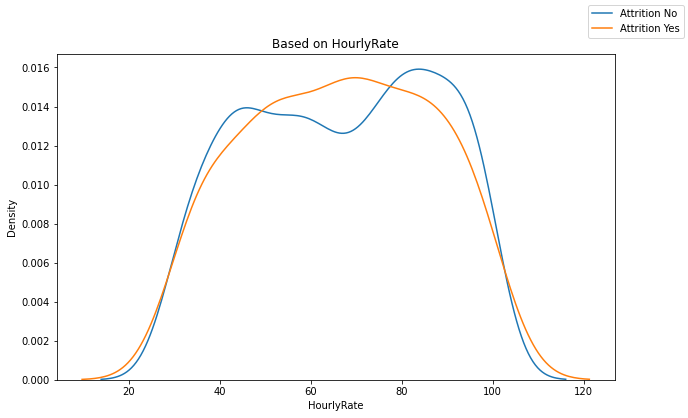

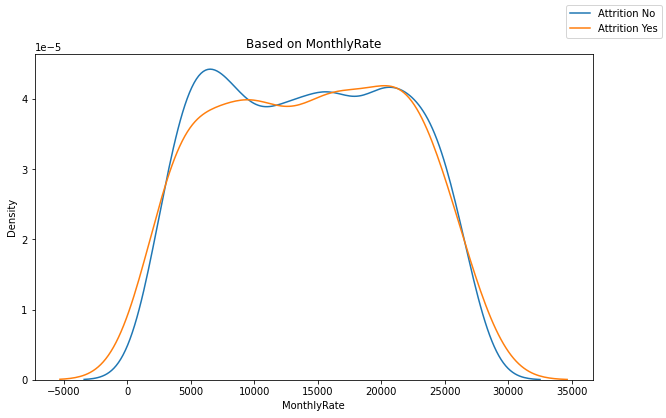

In [24]:
for feature in ['DailyRate','HourlyRate','MonthlyRate']:
    plot_numerical(feature)

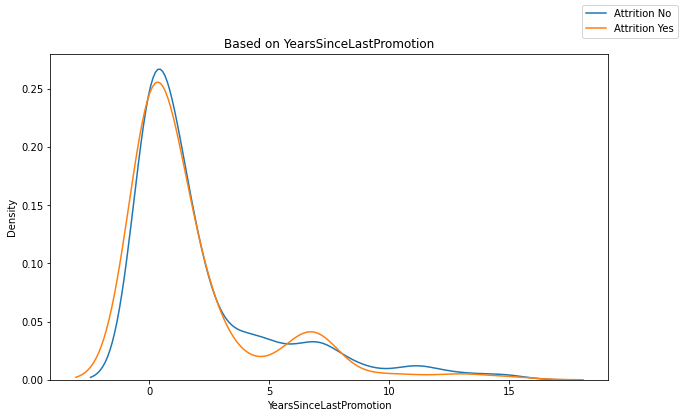

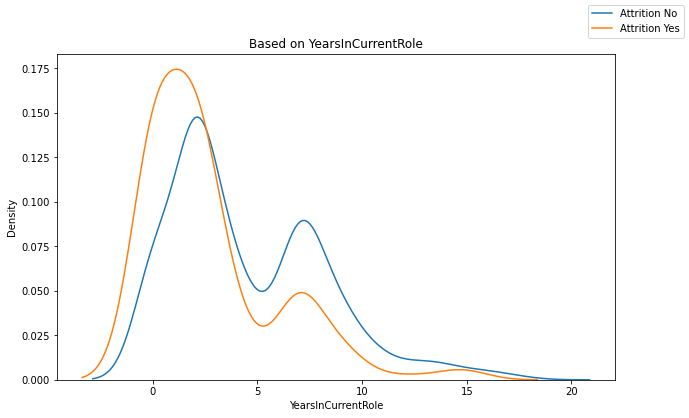

In [25]:
for feature in ['YearsSinceLastPromotion', 'YearsInCurrentRole']:
    plot_numerical(feature)

**Columns that seem to contribute towards Attrition:**

YearsWithCurrManager < 5\
YearsAtCompany < 5\
YearsInCurrentRole < 4\
TotalWorkingHours < 10\
DailyRate < 1000\
NumCompaniesWorked > 5\
MonthlyIncome < 5000\
Age < 35\
TrainingTimeLastYear - 0\
StockOptionLevel - 0\
OverTime - yes\
JobRole - Sales Representative\
Married - Single\
JobLevel - 1\
BusinessTravel - travel frequently\
EducationField - Technical Field, Human Resources\
WorkLifeBalance - 1\
EnvironmentSatisfaction - 1\
JobInvolvement - 1\
JobSatisfaction - 1

In [26]:
categorical_features = ['BusinessTravel', 'Department', 'JobRole', 'Education', 
                        'EducationField', 'Gender', 'MaritalStatus', 'OverTime']
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
                      'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                      'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                      'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

to_drop = ['StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber'] 

## Feature Engineering

In [28]:
#label encoding for categorical features 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [29]:
df = emp_train.copy()

In [32]:
path = "/Users/tanvir/Documents/Programming_Practice/Employee_attrition"

In [33]:
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))

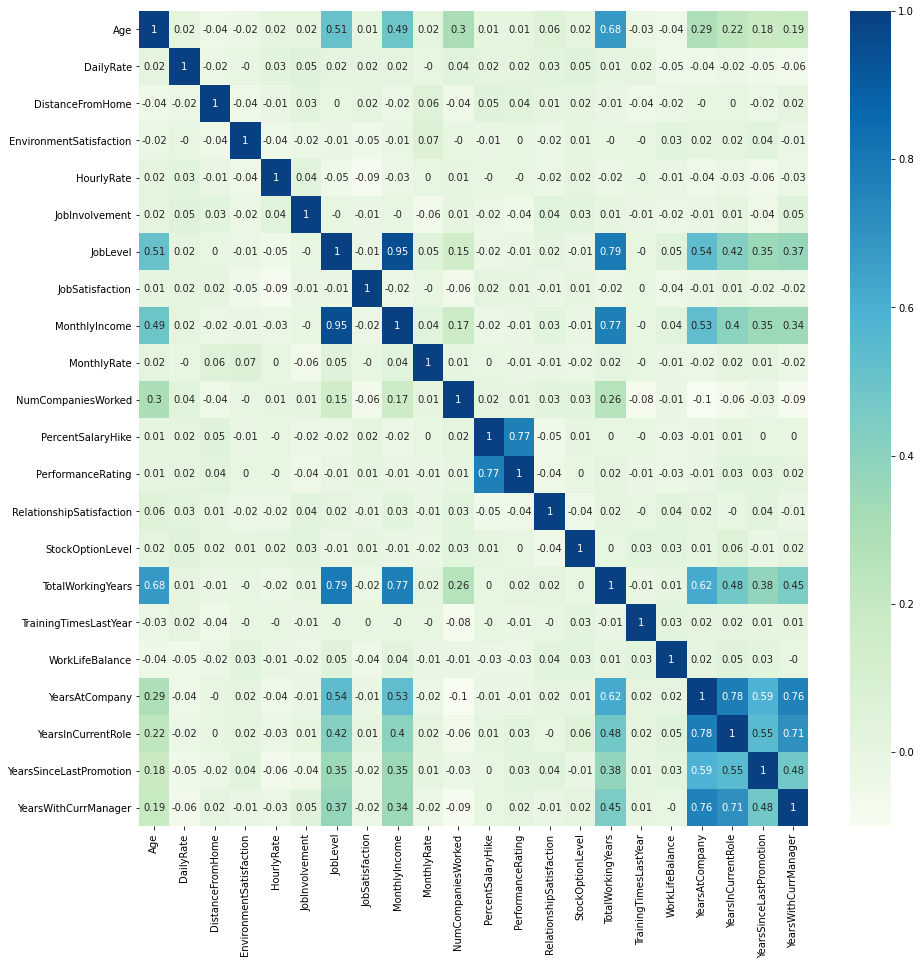

In [36]:
#correlation
plt.figure(figsize = (15,15))
sns.heatmap(round(emp_train[numerical_features].corr(),2), annot = True,
           mask = None, cmap = 'GnBu')
corr_mat = emp_train[numerical_features].corr()
plt.show()

In [38]:
#correlated Features
s = corr_mat.unstack()
so = s.sort_values(kind = "quicksort").drop_duplicates()
res1 = so[so>=0.6]
print(res1)

TotalWorkingYears     YearsAtCompany          0.624096
                      Age                     0.676650
YearsWithCurrManager  YearsInCurrentRole      0.705717
YearsAtCompany        YearsWithCurrManager    0.759755
MonthlyIncome         TotalWorkingYears       0.773499
PercentSalaryHike     PerformanceRating       0.774110
YearsAtCompany        YearsInCurrentRole      0.777925
JobLevel              TotalWorkingYears       0.786130
                      MonthlyIncome           0.952756
Age                   Age                     1.000000
dtype: float64


In [39]:
#observation - Task before the next live class

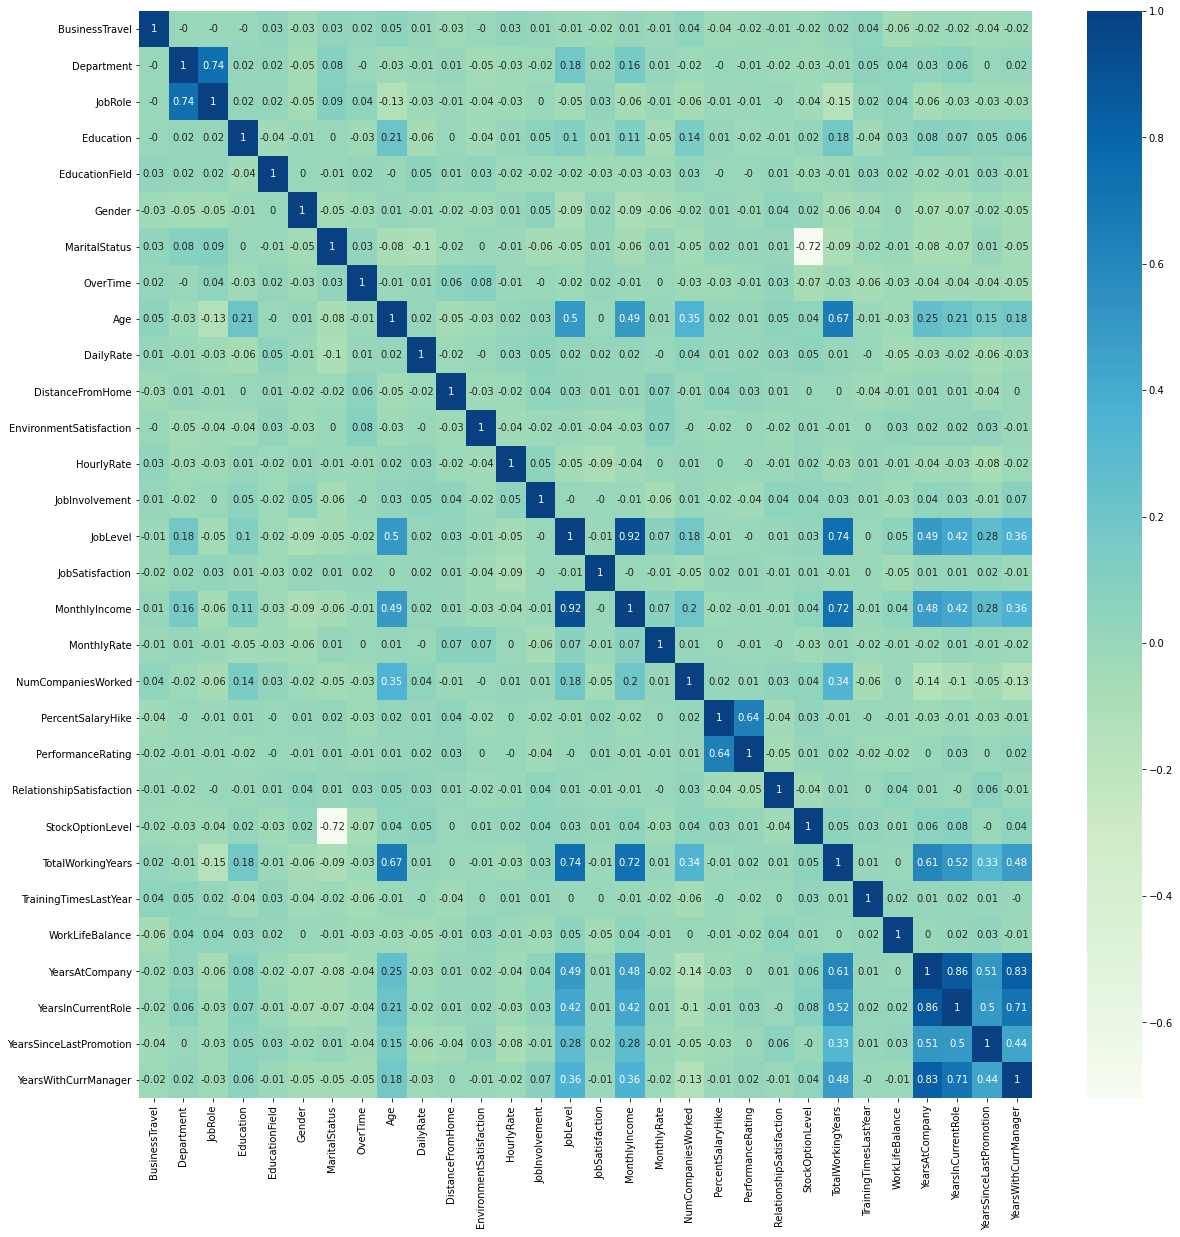

In [40]:
#Bivariate analysis Correlation plot with categorical variables
plt.figure(figsize = (20,20))
sns.heatmap(round(df[categorical_features + numerical_features].corr(method = 'spearman'),2), annot = True,
           mask = None, cmap = 'GnBu')
plt.show()

In [41]:
#observation